# Clean and Preprocessing Data

In [1]:
import warnings
warnings.simplefilter("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset:  brain.csv

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to
to the Size of the Head", Biometrika, Vol. 4, pp105-123

Description: Brain weight (grams) and head size (cubic cm) for 237
adults classified by gender and age group.

Variables/Columns
GENDER: Gender  /*1=Male, 2=Female*/
AGE: Age Range  /*1=20-46, 2=46+*/
SIZE: Head size (cm^3)  21-24
WEIGHT: Brain weight (grams)  29-32

In [2]:
# Read the csv file
brain = pd.read_csv("Resources/brain_categorical.csv")
brain.head()

,gender,age,size,weight
0,Male,20-46,4512,1530
1,Male,20-46,3738,1297
2,Male,20-46,4261,1335
3,Male,20-46,3777,1282
4,Male,20-46,4177,1590


In [3]:
# Step 1: Convert categorical data to numbers using integer or Binary Encoding
X = pd.get_dummies(brain[["size", "gender", "age"]])
y = brain["weight"].values.reshape(-1, 1)
X.head()

# Read the csv file
brain = pd.read_csv("Resources/brain_categorical.csv")
brain.head()

,gender,age,size,weight
0,Male,20-46,4512,1530
1,Male,20-46,3738,1297
2,Male,20-46,4261,1335
3,Male,20-46,3777,1282
4,Male,20-46,4177,1590


In [4]:
# Step 2: Split data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
# Step 3: Scale or Normalize the data.
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

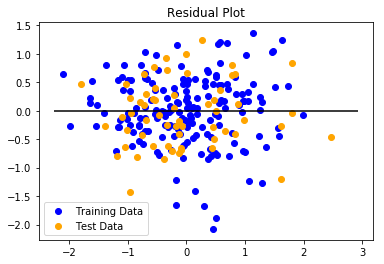

In [7]:
# Step 4: Fit the model to the scaled training data and make predictions using the scaled test data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled,
            c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled,
            c="orange", label="Test Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")

In [8]:
# Step 5: Quantify your model using the scaled data
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3230551580991293, R2: 0.6804912531419807
